# "Your Honor, ChatGPT Made Me Do It" : The New Ethics Crisis in Law

### In a 2023 case against Avianca, Inc., two lawyers were sanctioned for submitting a legal brief built on ChatGPT’s fabricated citations. Six entirely nonexistent judicial opinions that cost them a $5,000 penalty and a formal order to notify their client and the judges whose names had been falsely invoked. The incident became the first high-profile example of how generative AI can blur the line between efficiency and ethical failure in law.

### Using Damien Charlotin’s global “AI Hallucination Cases” database, this project analyzes more than 400 documented legal decisions where AI hallucinations surfaced in court filings. Through three panels, it charts the monthly rise of incidents alongside major LLM releases, identifies who used these tools most, and reveals how judges are responding. Together, the data exposes a profession racing to harness AI faster than it can regulate its truth.

### 🔗 Reproducibility
The processed dataset used in this notebook can be accessed at:  
[Mini-Project #1 Repo](https://github.com/murathan9165/iphs200-3-panel-story-mp-1)


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cases_df = pd.read_csv("https://raw.githubusercontent.com/murathan9165/iphs200-3-panel-story-mp-1/refs/heads/main/adjusted_charlotin.csv")
dates_df = pd.read_csv("https://raw.githubusercontent.com/murathan9165/iphs200-3-panel-story-mp-1/refs/heads/main/filtered_llm_releases.csv")

display(cases_df.head())
display(dates_df.head())

,Date,Party(ies),Professional Sanction
0,2023-05-08,Pro Se Litigant,No
1,2023-05-29,Pro Se Litigant,No
2,2023-06-14,Pro Se Litigant,No
3,2023-06-22,Lawyer,No
4,2023-06-29,Lawyer,No


,model-name,announced-date
0,Claude Sonnet 4.5,2025-09-01
1,GPT-5,2025-08-01
2,GPT-4.1,2025-04-01
3,GPT-4.5,2025-02-01
4,Claude 3.7 Sonnet,2025-02-01


# Panel 1: The Meteoric Rise of Cases... and also new LLMs.

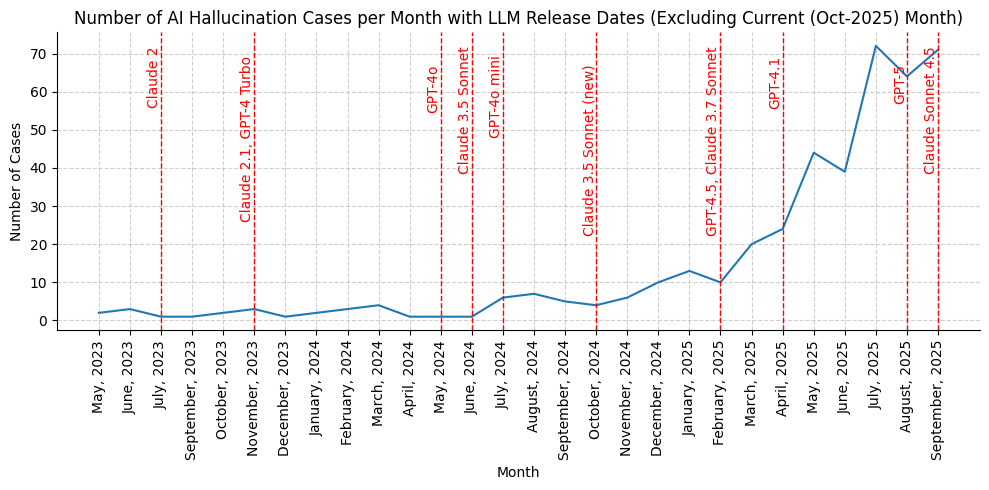

In [57]:
# Ensure 'Date' is datetime and create 'Month'
cases_df['Date'] = pd.to_datetime(cases_df['Date'])
cases_df['Month'] = cases_df['Date'].dt.to_period('M')

# Group by month and count cases
monthly_cases = cases_df.groupby('Month').size().reset_index(name='Count')

# Convert 'Month' to string for plotting and then format as "Month, Year"
monthly_cases['Month'] = monthly_cases['Month'].astype(str)
monthly_cases['Month_Formatted'] = pd.to_datetime(monthly_cases['Month']).dt.strftime('%B, %Y')

# Exclude the last month
monthly_cases_filtered = monthly_cases.iloc[:-1]

# Create the relplot using the formatted month
g = sns.relplot(data=monthly_cases_filtered, x='Month_Formatted', y='Count', kind='line', aspect=2)

# Rotate x-axis labels for better readability
g.set_xticklabels(rotation=90)

# Ensure 'announced-date' in dates_df is datetime
dates_df['announced-date'] = pd.to_datetime(dates_df['announced-date'])

# Group LLMs by release month to handle overlaps
monthly_releases = dates_df.groupby(dates_df['announced-date'].dt.to_period('M'))['model-name'].apply(list).reset_index()
monthly_releases['announced-date'] = monthly_releases['announced-date'].astype(str)


# Add vertical lines and text labels for LLM release dates
ax = g.fig.axes[0] # Get the single axes from the FacetGrid
for index, row in monthly_releases.iterrows():
    release_month_formatted = pd.to_datetime(row['announced-date']).strftime('%B, %Y')
    if release_month_formatted in monthly_cases_filtered['Month_Formatted'].values:
        # Find the x-position for the release month
        x_pos = monthly_cases_filtered[monthly_cases_filtered['Month_Formatted'] == release_month_formatted].index[0]
        ax.axvline(x=x_pos, color='red', linestyle='--', lw=1)

        # Get the list of models for this month and join them for the label
        models_in_month = row['model-name']
        label_text = ", ".join(models_in_month)

        # Add text label near the vertical line, adjust vertical position for stacking
        y_pos = ax.get_ylim()[1] * 0.95 - (index % 3) * (ax.get_ylim()[1] * 0.03) # Simple stacking
        ax.text(x=x_pos, y=y_pos, s=label_text, rotation=90, verticalalignment='top', horizontalalignment='right', color='red')

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.6)


plt.title('Number of AI Hallucination Cases per Month with LLM Release Dates (Excluding Current (Oct-2025) Month)')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.tight_layout()
plt.show()

## LLMs taking the world by storm can be mapped onto the rising trend of cases in the past two years.

## In addition to the rapid rate of adoption, we can see that early models like GPT-4 Classic and Claude 2 did not strike confidence in legal use. The hallucinations of these early models could easily be detected by college, even high school students, therefore it's not surprising to see that these models were not preferred to craft legal arguments.

## However, as multimodal models like GPT-4o displayed unprecedented fluency and confidence, hallucinations became harder to spot by the users. Consequently, the number of AI-related mishaps skyrocketed.


# Panel 2: Who _Chat-ed_ The Cases?

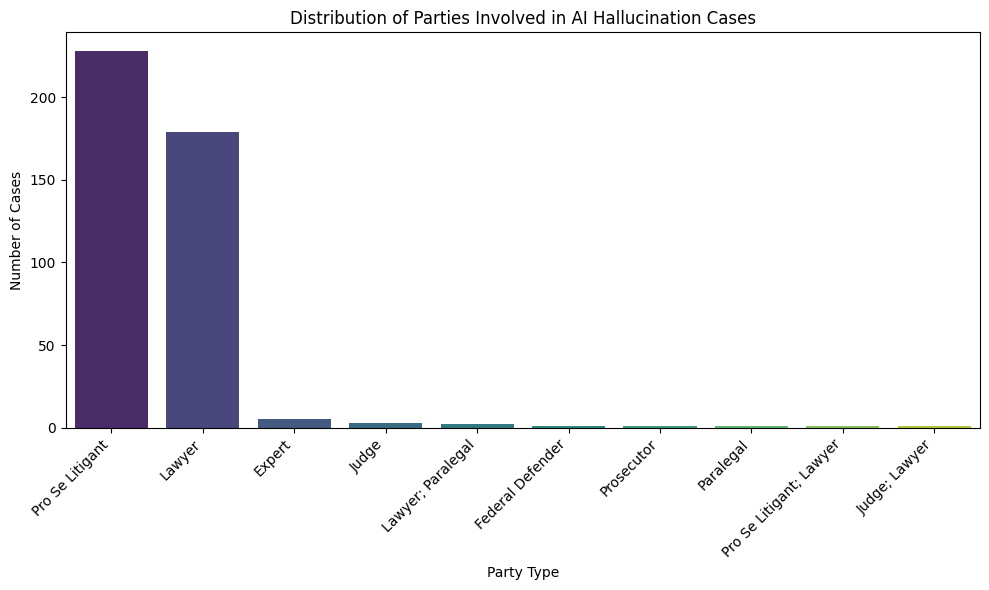

In [58]:
# Count the occurrences of each party type
party_counts = cases_df['Party(ies)'].value_counts().reset_index()
party_counts.columns = ['Party', 'Count']

# Create a bar plot to show the distribution of parties
plt.figure(figsize=(10, 6))
sns.barplot(data=party_counts, x='Party', y='Count', hue='Party', palette='viridis', legend=False)

plt.title('Distribution of Parties Involved in AI Hallucination Cases')
plt.xlabel('Party Type')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## The misuse of LLMs in court is dominated people representing themselves ("Pro se" litigants) and lawyers.

## It is easier to accept that a layperson trying to defend himself in court resorted to an LLM to construct their argument. After all, for most people LLMs are the most accessible, knowledgeable, and fast generators of coherent text.

## However, it is alarming to see that practicing lawyers, professionals whose arguments determine the trajectories of the lives of others, are using LLMs to construct their cases. In addition, presenting these cases without thorough review of their evidence, sources, precedents, or opinions.

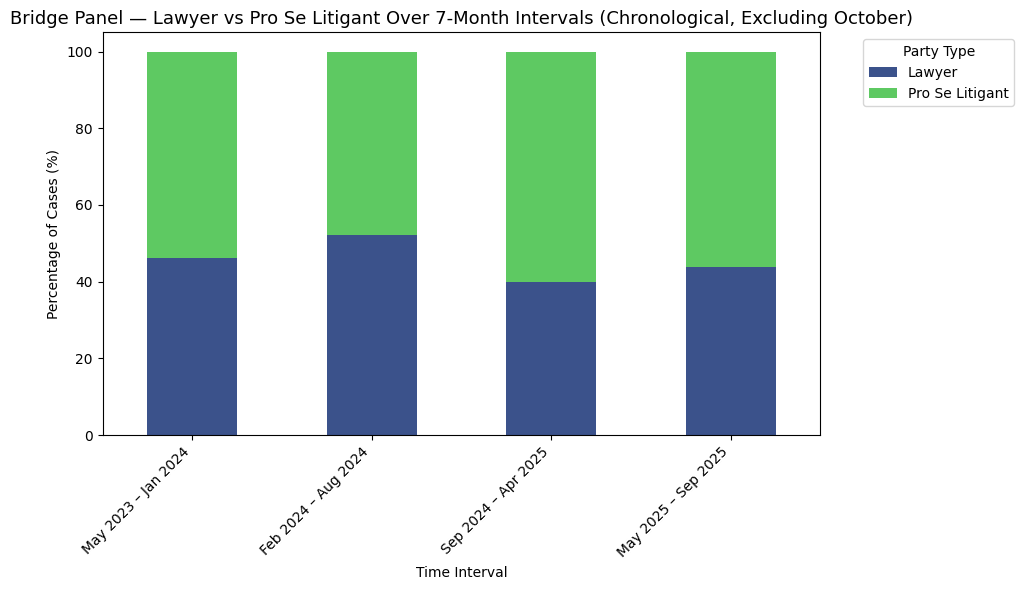

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Ensure Month_Formatted exists ---
cases_df['Month_Formatted'] = pd.to_datetime(cases_df['Date']).dt.strftime('%B, %Y')

# --- Filter for Lawyers and Pro Se Litigants only ---
filtered_cases = cases_df[cases_df['Party(ies)'].isin(['Lawyer', 'Pro Se Litigant'])].copy()

# --- Convert to datetime and exclude October ---
filtered_cases['Month'] = pd.to_datetime(filtered_cases['Month_Formatted'], format='%B, %Y')
filtered_cases = filtered_cases[filtered_cases['Month'].dt.month != 10]  # remove October

# --- Sort chronologically ---
filtered_cases = filtered_cases.sort_values('Month')

# --- Assign each month to a 7-month interval ---
filtered_cases['Interval'] = ((filtered_cases['Month'].rank(method='dense') - 1) // 7 + 1).astype(int)

# --- Create readable labels like "May 2023 – Nov 2023" ---
interval_labels = []
unique_months = filtered_cases['Month'].sort_values().unique()
for i in range(0, len(unique_months), 7):
    start = pd.to_datetime(unique_months[i]).strftime('%b %Y')
    end = pd.to_datetime(unique_months[min(i + 6, len(unique_months) - 1)]).strftime('%b %Y')
    interval_labels.append(f"{start} – {end}")
interval_map = dict(zip(range(1, len(interval_labels) + 1), interval_labels))
filtered_cases['Interval_Label'] = filtered_cases['Interval'].map(interval_map)

# --- Count cases per interval and party type ---
interval_party = (
    filtered_cases.groupby(['Interval_Label', 'Party(ies)'])
    .size()
    .reset_index(name='Count')
)

# --- Calculate percentages per interval ---
interval_party['Total'] = interval_party.groupby('Interval_Label')['Count'].transform('sum')
interval_party['Percentage'] = interval_party['Count'] / interval_party['Total'] * 100

# --- Ensure chronological order of intervals ---
interval_party['Interval_Start'] = interval_party['Interval_Label'].apply(lambda x: pd.to_datetime(x.split('–')[0].strip(), format='%b %Y'))
interval_party = interval_party.sort_values('Interval_Start')

# --- Pivot for stacked bar chart (chronologically sorted) ---
pivot = interval_party.pivot(index='Interval_Label', columns='Party(ies)', values='Percentage')
pivot = pivot.loc[interval_party['Interval_Label'].unique()]  # preserve order

# --- Plot ---
pivot.plot(kind='bar', stacked=True, figsize=(10,6), color=['#3b528b', '#5ec962'])
plt.title('Bridge Panel — Lawyer vs Pro Se Litigant Over 7-Month Intervals (Chronological, Excluding October)', fontsize=13)
plt.ylabel('Percentage of Cases (%)')
plt.xlabel('Time Interval')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Party Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Panel 3: How do we punish misuse?

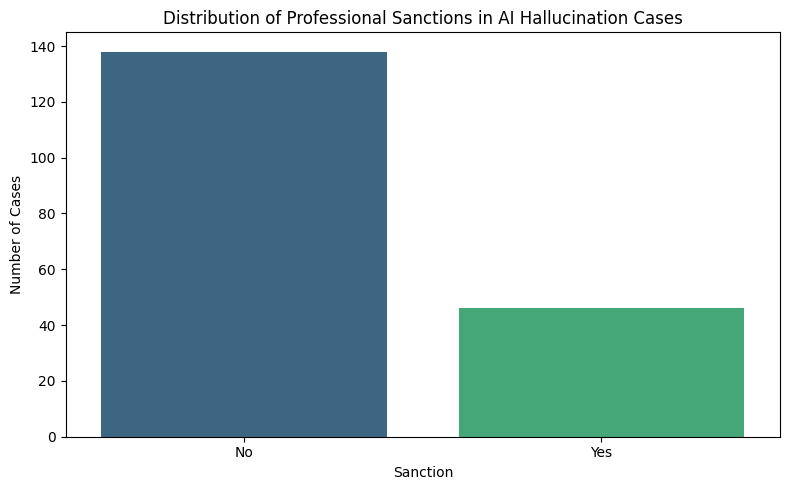

In [59]:
# Filter cases where 'Professional Sanction' is not null or empty, and is either 'Yes' or 'No'
# We'll focus on 'Lawyer' and 'Expert' as they are explicitly mentioned as professionals in the data
professional_cases = cases_df[cases_df['Party(ies)'].isin(['Lawyer', 'Expert'])].copy()

# Count the occurrences of each sanction type for professionals
sanction_counts = professional_cases['Professional Sanction'].value_counts().reset_index()
sanction_counts.columns = ['Sanction', 'Count']

# Create a bar plot to show the distribution of sanctions
plt.figure(figsize=(8, 5))
sns.barplot(data=sanction_counts, x='Sanction', y='Count', hue='Sanction', palette='viridis', legend=False)

plt.title('Distribution of Professional Sanctions in AI Hallucination Cases')
plt.xlabel('Sanction')
plt.ylabel('Number of Cases')
plt.tight_layout()
plt.show()

## The majority of those who brought hallucinated arguments before a judge faced no professional sanctions, suggesting that the legal system is still learning how to respond to this new kind of misconduct.

## Only a minority of cases resulted in disciplinary action, showing that, so far, judges have treated these incidents as cautionary rather than malicious. Appealing to poor understanding rather than intent to deceive.

## Yet, not all slip-ups were forgiven. Although unable to keep up with the development of smarter LLMs, courts are shaping up their boundaries. In the AI age, courts cannot afford to attribute such misuse to simple ignorance.


# Final Thoughts

### The jaw-dropping confidence of flagship LLM models have caused the widespread use of LLMs in constructing legal arguments, however this diffusion of Generative AI into the legal scene happened so much faster than it could be regulated.

### As a result, courtrooms have become unexpected testing grounds for the limits of artificial intelligence and human judgment alike. What began as isolated mishaps has evolved into a global pattern of overreliance, where both everyday litigants and seasoned lawyers mistake fluency for truth. Judges, caught between innovation and integrity, are now setting the first boundaries of accountability in the AI age. These early cases mark a defining moment for how society learns to balance progress with responsibility.
